## 데이터 불러오기 & 전처리

### iris 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [ ]:
iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### EDA - 컬럼명 재할당

In [ ]:
column_name_lst = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
iris_df.columns = column_name_lst

column_replace_dict = {k:v for k,v in zip(iris.feature_names, column_name_lst)}
iris_df.rename(column_replace_dict, axis=1, inplace=True)
print(iris_df.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


In [ ]:
iris_df["target"] = iris.target

iris_df.target.unique()

array([0, 1, 2])

### EDA - 결측값 확인


In [ ]:
iris_df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
target,0


###  EDA - 데이터 시각화

In [ ]:
iris_df.dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
target,int64


In [ ]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
import plotly.express as px

# scatter plot 생성
fig = px.scatter(iris_df, x="sepal_width", y="sepal_length")

# 그래프 사이즈 조절
fig.update_layout(width=600, height=500)

# 그래프 확인
fig.show()

In [ ]:
# scatter plot에 target컬럼 색으로 나타내기
fig = px.scatter(iris_df, x="sepal_width", y="sepal_length", color="target")
fig.update_layout(width=600, height=500)
fig.show()

In [ ]:
# 다른 컬럼으로 scatter plot 만들기
fig = px.scatter(iris_df, x="petal_width", y="petal_length", color="target")
fig.update_layout(width=600, height=500)
fig.show()

## Clustering : K-Means 알고리즘

In [ ]:
from sklearn.cluster import KMeans

### train, test set 분리

In [ ]:
x = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=810)


### K-Means 훈련

In [ ]:
km = KMeans(n_clusters = 5)
km

KMeans(n_clusters=5)

In [ ]:
km.fit(x_train)
clusters_array = km.labels_
print(clusters_array)

[1 2 2 2 1 1 0 1 0 2 0 0 2 3 1 3 1 2 2 1 3 1 2 1 2 0 2 0 1 2 1 1 2 1 4 3 4
 1 1 0 2 1 2 2 1 1 2 3 0 3 2 3 2 3 1 4 0 4 3 1 3 3 4 1 2 1 0 1 3 1 1 0 1 0
 2 1 2 1 0 3 1 2 1 0 0 4 1 1 1 1 4 4 3 2 0 0 3 0 4 3 1 1 4 0 3 4 1 1 4 3 1
 1 1 0 2 1 0 0 0 0]


In [ ]:
compare_clusters = dict(zip(clusters_array, y_train))
print(compare_clusters)

{np.int32(1): 0, np.int32(2): 1, np.int32(0): 2, np.int32(3): 1, np.int32(4): 1}


In [ ]:
fig = px.scatter(x=x_train["petal_width"], y=x_train["petal_length"], color=clusters_array)
fig.update_layout(width=600, height=500)
fig.show()

In [ ]:
fig = px.scatter(x=x_train["sepal_width"], y=x_train["sepal_length"], color=clusters_array)
fig.update_layout(width=600, height=500)
fig.show()

In [ ]:
# Sum of squared distances of samples to their closest cluster center.

km.inertia_

43.306686507936504

### 최적의 k 찾기 (Elbow method)





In [ ]:
# elbow method를 사용하여 최적의 k를 탐색
# k와 sum of squared distances from each point의 합(distortions)을 비교

distortions = []
k_range = range(1,11)
for i in k_range:
  km = KMeans(n_clusters = i)
  km.fit(x_train)
  distortions.append(km.inertia_)

print(distortions)

[537.8054166666667, 116.03907894736842, 61.790215810462115, 45.93773976491016, 41.67340541267012, 31.455729121993606, 27.952216806722678, 26.611751675796867, 22.85088679947504, 21.940542483660135]


In [ ]:
fig = px.line(x=k_range, y=distortions, labels={"x":"k", "y":"distortions"})
fig.update_layout(width=800, height=500)
fig.show()

### 최적의 k 찾기 (KElbowVisualizer 사용)

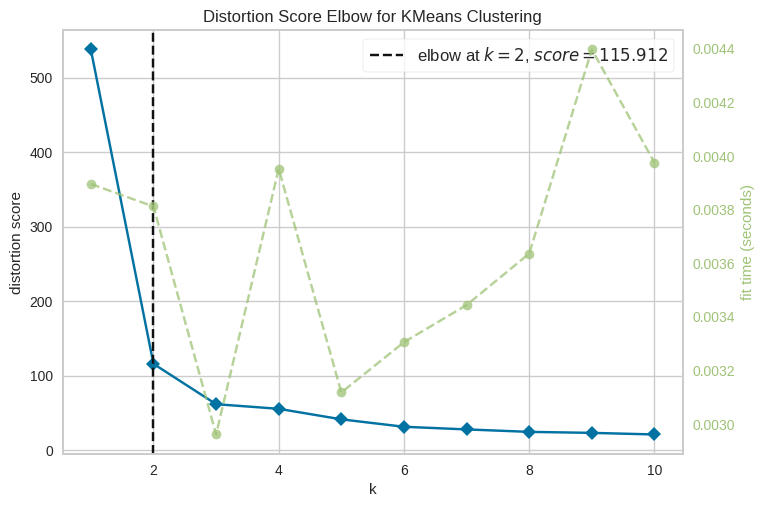

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

km = KMeans()
visualizer = KElbowVisualizer(km, k=(1,11))
visualizer.fit(x_train)
visualizer.poof()

최적의 k 찾기 (kneed 사용

In [ ]:
# !pip install kneed

In [ ]:
from kneed import KneeLocator

"""
[KneeLocator parameter]
curve (str) – If ‘concave’, algorithm will detect knees. If ‘convex’, it will detect elbows.
direction (str) – one of {“increasing”, “decreasing”}
"""

kneedle = KneeLocator(x=k_range, y=distortions, S=1.0, curve="convex", direction="decreasing")
print(f"최적의 k : {round(kneedle.elbow, 3)}")
print(f"최적의 k의 y값 : {round(kneedle.elbow_y, 3)}")

최적의 k : 2
최적의 k의 y값 : 116.039


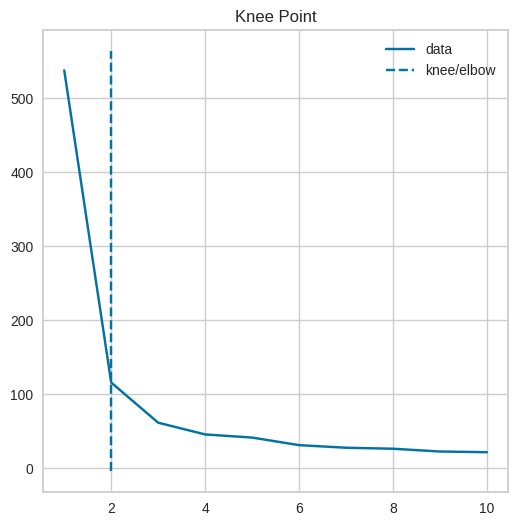

In [ ]:
kneedle.plot_knee()

### 최적의 k 찾기 (Silhouette method)



In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

k_range = range(2,11)
for i in k_range:
  km = KMeans(n_clusters = i)
  km.fit(x_train)
  label=km.predict(x_train)
  sc_value = silhouette_score(np.array(x_train), label, metric="euclidean", sample_size=None, random_state=810)
  silhouette_scores.append(sc_value)
  print(f'Silhouette score(n={i}): {sc_value}')

Silhouette score(n=2): 0.6863029732062546
Silhouette score(n=3): 0.5508121380783589
Silhouette score(n=4): 0.49515351277316094
Silhouette score(n=5): 0.4896667958834294
Silhouette score(n=6): 0.441378578785523
Silhouette score(n=7): 0.33537967912474115
Silhouette score(n=8): 0.4480273516204369
Silhouette score(n=9): 0.3428077002979432
Silhouette score(n=10): 0.2805287686221822


In [ ]:
fig = px.line(x=k_range, y=silhouette_scores, labels={"x":"k", "y":"Silhouette scores"})
fig.update_layout(width=800, height=500)
fig.show()

### 최적의 k 찾기 (SilhouetteVisualizer 사용)


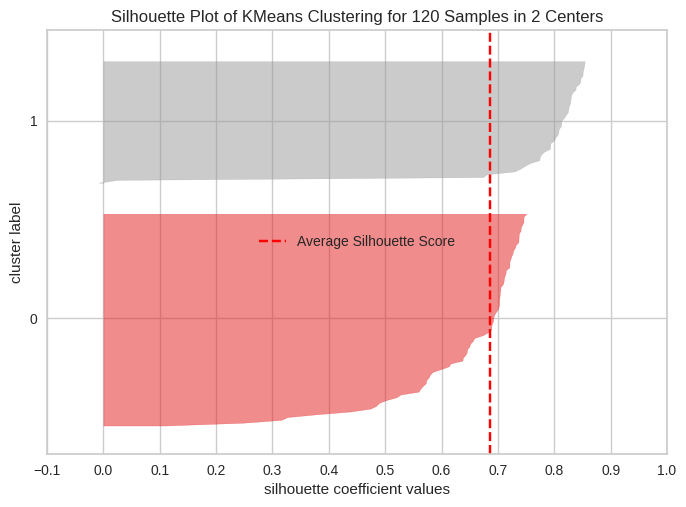

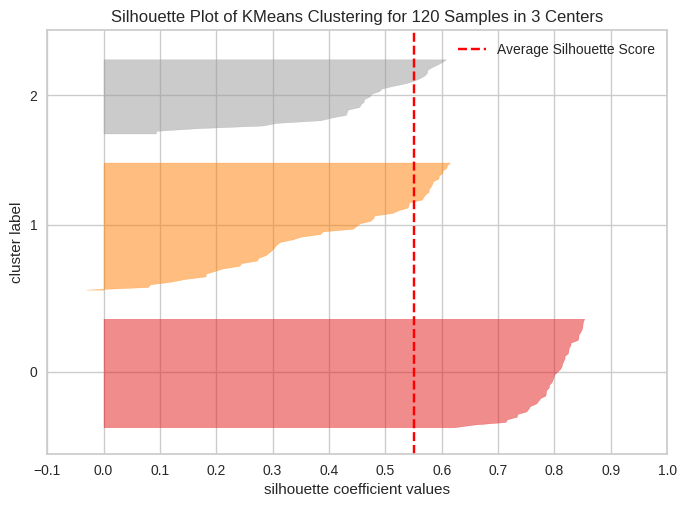

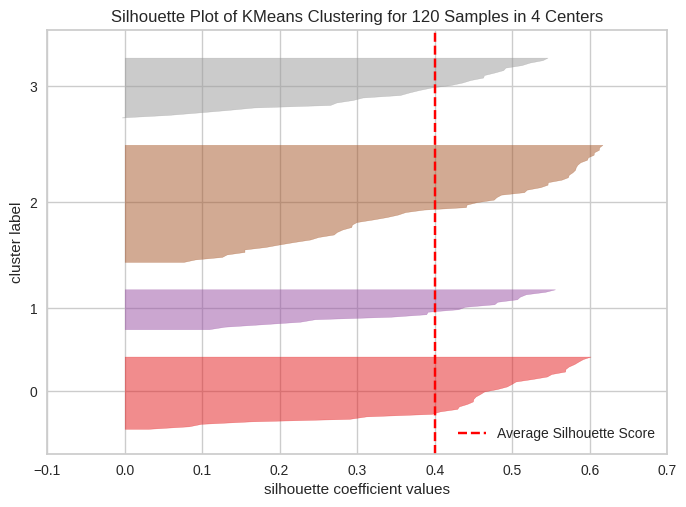

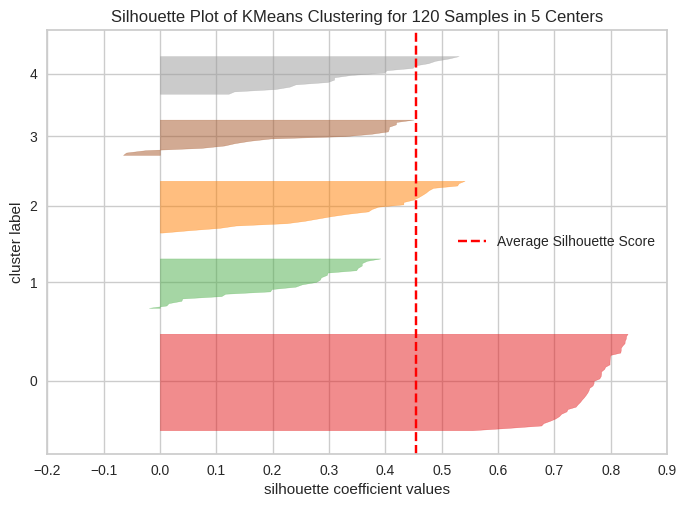

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

k_range = range(2,6)
for i in k_range:
    km = KMeans(n_clusters=i, init="k-means++")
    visualizer = SilhouetteVisualizer(km)
    visualizer.fit(x_train)
    visualizer.poof()

### 최적의 k를 사용하여 모델 훈련

In [ ]:
k = 3
km = KMeans(n_clusters = k).fit(x_train)
train_cluster = km.labels_

### 훈련된 cluster 그래프로 비교

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual","K-means cluster"))

fig.add_trace(
    go.Scatter(x=x_train["sepal_width"],
               y=x_train["sepal_length"],
               mode="markers",
               marker=dict(color=y_train),
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=x_train["sepal_width"],
               y=x_train["sepal_length"],
               mode="markers",
               marker=dict(color=train_cluster),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual","K-means cluster"))

fig.add_trace(
    go.Scatter(x=x_train["petal_width"],
               y=x_train["petal_length"],
               mode="markers",
               marker=dict(color=y_train),
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=x_train["petal_width"],
               y=x_train["petal_length"],
               mode="markers",
               marker=dict(color=train_cluster),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()


### 훈련된 모델에 test set을 사용해 예측

In [ ]:
test_cluster = km.fit_predict(x_test)
print(test_cluster)
print(list(y_test))

[0 2 1 2 1 1 2 0 2 0 1 2 2 2 0 1 2 2 0 1 2 2 2 0 1 1 1 0 0 2]
[2, 2, 0, 1, 0, 0, 1, 2, 2, 2, 0, 2, 2, 1, 2, 0, 1, 2, 2, 0, 1, 1, 1, 2, 1, 0, 0, 2, 2, 1]


In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual-test","K-means cluster-test"))

fig.add_trace(
    go.Scatter(x=x_train["sepal_width"],
               y=x_train["sepal_length"],
               mode="markers",
               marker=dict(color=y_train),
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=x_train["sepal_width"],
               y=x_train["sepal_length"],
               mode="markers",
               marker=dict(color=test_cluster),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual-test","K-means cluster-test"))

fig.add_trace(
    go.Scatter(x=x_train["petal_width"],
               y=x_train["petal_length"],
               mode="markers",
               marker=dict(color=y_train),
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=x_train["petal_width"],
               y=x_train["petal_length"],
               mode="markers",
               marker=dict(color=test_cluster),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

### clustering 결과를 수치적으로 평가

In [ ]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, train_cluster)
test_acc = accuracy_score(y_test, test_cluster)
print(f"Accuracy score of train set : {round(train_acc, 4)}")
print(f"Accuracy score of test set : {round(test_acc, 4)}")

Accuracy score of train set : 0.425
Accuracy score of test set : 0.2


### 실제 cluster명과 매칭해서 accuracy 확인


In [ ]:
import scipy

def find_matching_cluster(cluster_case, actual_labels, cluster_labels):
    matched_cluster = {}
    actual_case = list(set(actual_labels))
    for i in cluster_case:
        idx = cluster_labels == i
        new_label = scipy.stats.mode(actual_labels[idx], keepdims=True).mode[0]
        # 동일한 위치의 label에서 가장 빈번한 cluster명을 찾아쥼 (=mode)
        new_label = int(new_label)
        if new_label in actual_case:
            actual_case.remove(new_label)
        matched_cluster[i] = new_label
        print(f"훈련된 label명: {i} >> 가장 빈번한 실제 label명: {new_label}")

    return matched_cluster

In [ ]:
km_train_case = list(set(train_cluster))
print(km_train_case)

[np.int32(0), np.int32(1), np.int32(2)]


In [ ]:
train_perm_dict = find_matching_cluster(km_train_case, y_train, train_cluster)
print(list(y_train)[:10])
print(train_cluster[:10])
print(train_perm_dict)

훈련된 label명: 0 >> 가장 빈번한 실제 label명: 0
훈련된 label명: 1 >> 가장 빈번한 실제 label명: 1
훈련된 label명: 2 >> 가장 빈번한 실제 label명: 0
[0, 1, 1, 1, 0, 0, 2, 0, 2, 1]
[2 1 1 1 2 0 1 2 1 1]
{np.int32(0): 0, np.int32(1): 1, np.int32(2): 0}


In [ ]:
km_test_case = list(set(test_cluster))
print(km_test_case)

test_perm_dict = find_matching_cluster(km_test_case, y_test, test_cluster)
print(list(y_test)[:10])
print(train_cluster[:10])
print(train_perm_dict)

[np.int32(0), np.int32(1), np.int32(2)]
훈련된 label명: 0 >> 가장 빈번한 실제 label명: 2
훈련된 label명: 1 >> 가장 빈번한 실제 label명: 0
훈련된 label명: 2 >> 가장 빈번한 실제 label명: 1
[2, 2, 0, 1, 0, 0, 1, 2, 2, 2]
[2 1 1 1 2 0 1 2 1 1]
{np.int32(0): 0, np.int32(1): 1, np.int32(2): 0}


In [ ]:
train_new_labels = [train_perm_dict[label] for label in train_cluster]
test_new_labels = [test_perm_dict[label] for label in test_cluster]

In [ ]:
train_acc = accuracy_score(y_train, train_new_labels)
test_acc = accuracy_score(y_test, test_new_labels)
print(f"Accuracy score of train set : {round(train_acc, 4)}")
print(f"Accuracy score of test set : {round(test_acc, 4)}")

Accuracy score of train set : 0.6667
Accuracy score of test set : 0.8


##Agglomerative 알고리즘 (계층군집)



### K-means VS Agglomerative 비교


[k-means 최적의 환경]
- 원형 혹은 구(spherical) 형태의 분포
- 동일한 데이터 분포 (size of cluster)
- 동일한 밀집도 (dense of cluster)
- 군집의 센터에 주로 밀집된 분포
- Noise와 outlier가 적은 분포


   
[k-means의 민감성]
- Noise와 outlier에 민감함.  
- 처음 시작하는 점에 따라 결과에 영향을 줌.  
- k값을 직접 설정해야하는 어려움이 있음.



### Agglomerative - Agglomerative 모듈 탐색 훈련

In [ ]:
from sklearn.cluster import AgglomerativeClustering


[AgglomerativeClustering 파라미터]
- linkage 종류 : {‘ward’, ‘complete’, ‘average’, ‘single’}
- linkage="ward"이면, metric="euclidean"만 가능.
- distance_threshold!=None 이면, n_clusters=None
- distance_threshold!=None 이면, compute_full_tree=True

In [ ]:
aggl = AgglomerativeClustering(n_clusters=3, linkage="ward", metric="euclidean").fit(x_train)
aggl

AgglomerativeClustering(n_clusters=3)

### Agglomerative - 훈련된 cluster를 그래프로 비교

In [ ]:
aggl_labels = aggl.labels_

fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual","Agglomerative cluster"))

fig.add_trace(
    go.Scatter(x=x_train["sepal_width"],
               y=x_train["sepal_length"],
               mode="markers",
               marker=dict(color=y_train),
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=x_train["sepal_width"],
               y=x_train["sepal_length"],
               mode="markers",
               marker=dict(color=aggl_labels),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800, showlegend=False)
fig.show()

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual","Agglomerative cluster"))

fig.add_trace(
    go.Scatter(x=x_train["petal_width"],
               y=x_train["petal_length"],
               mode="markers",
               marker=dict(color=y_train),
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=x_train["petal_width"],
               y=x_train["petal_length"],
               mode="markers",
               marker=dict(color=aggl_labels),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800, showlegend=False)
fig.show()

### Agglomerative - clustering 결과를 수치적으로 평가

In [ ]:
aggl_case = list(set(aggl_labels))
print(aggl_case)

aggl_perm_dict = find_matching_cluster(aggl_case, y_train, aggl_labels)
print(aggl_perm_dict)

aggl_new_labels = [aggl_perm_dict[label] for label in aggl_labels]

[np.int64(0), np.int64(1), np.int64(2)]
훈련된 label명: 0 >> 가장 빈번한 실제 label명: 1
훈련된 label명: 1 >> 가장 빈번한 실제 label명: 0
훈련된 label명: 2 >> 가장 빈번한 실제 label명: 2
{np.int64(0): 1, np.int64(1): 0, np.int64(2): 2}


In [ ]:
aggl_acc = accuracy_score(y_train, aggl_new_labels)
print(f"Accuracy score of K-means : {round(train_acc, 4)}")
print(f"Accuracy score of Agglomerative : {round(aggl_acc, 4)}")

Accuracy score of K-means : 0.6667
Accuracy score of Agglomerative : 0.9083


### Agglomerative - dendrogram을 그리기 위한 linkage matrix 구성 이해


In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
sample_arr = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]
sample_arr

[[2], [8], [0], [4], [1], [9], [9], [0]]

In [ ]:
sample_linkage = linkage(sample_arr, "single")
print(sample_linkage)

[[ 2.  7.  0.  2.]
 [ 5.  6.  0.  2.]
 [ 0.  4.  1.  2.]
 [ 8. 10.  1.  4.]
 [ 1.  9.  1.  3.]
 [ 3. 11.  2.  5.]
 [12. 13.  4.  8.]]


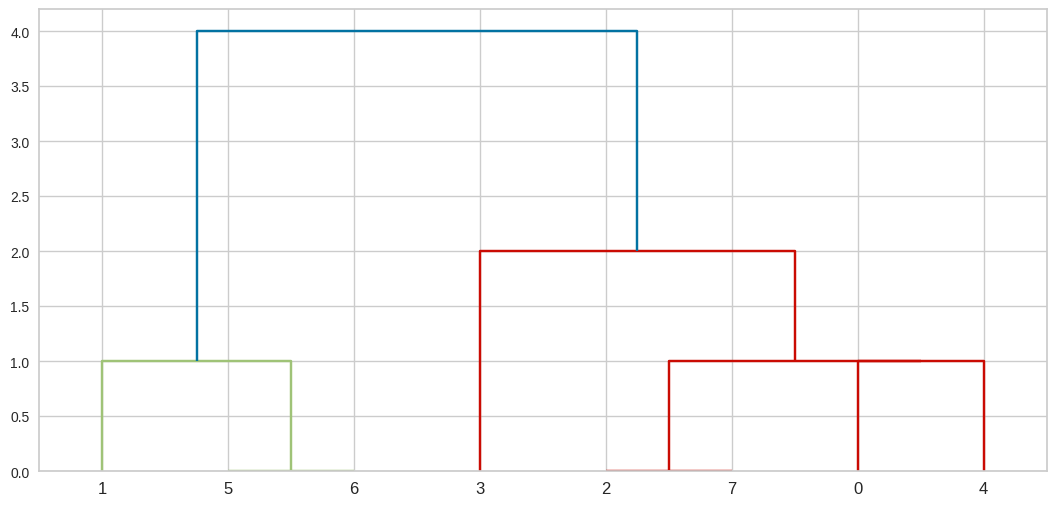

In [ ]:
fig = plt.figure(figsize=(13, 6))
dn = dendrogram(sample_linkage)
plt.show()

###Agglomerative - dendrogram을 통해 알고리즘 이해

In [ ]:
def create_linkage(model):
  # 각 노드에 총 point수를 계산하기
  counts = np.zeros(model.children_.shape[0]) # children 길이만큼 0 채운 array
  n_samples = len(model.labels_) # 각 point의 cluster label
  for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
      if child_idx < n_samples:
        current_count += 1  # leaf node
      else:
        current_count += counts[child_idx - n_samples]
    counts[i] = current_count

  linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
  return linkage_matrix

In [ ]:
aggl_dend = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(x_train)

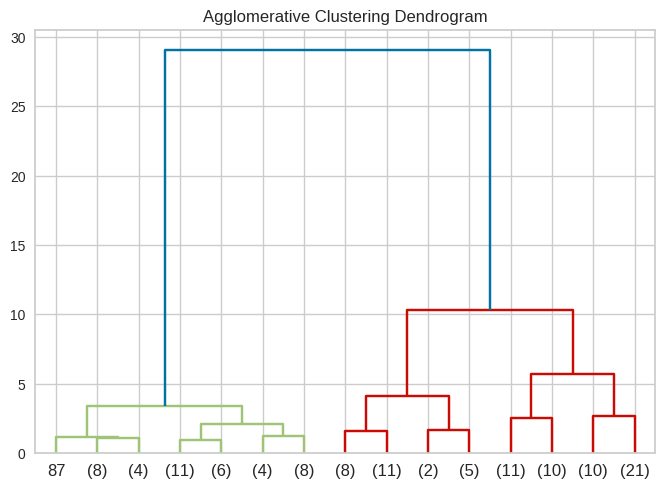

In [ ]:
plt.title('Agglomerative Clustering Dendrogram')
linkage_matrix = create_linkage(aggl_dend)
dendrogram(linkage_matrix, truncate_mode="level", p=3)
plt.show()

In [ ]:
aggl = AgglomerativeClustering(n_clusters=4, linkage="ward", metric="euclidean").fit(x_train)
aggl

AgglomerativeClustering(n_clusters=4)

In [ ]:
aggl_labels = aggl.labels_

fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual","Agglomerative cluster"))

fig.add_trace(
    go.Scatter(x=x_train["sepal_width"],
               y=x_train["sepal_length"],
               mode="markers",
               marker=dict(color=y_train),
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=x_train["sepal_width"],
               y=x_train["sepal_length"],
               mode="markers",
               marker=dict(color=aggl_labels),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800, showlegend=False)
fig.show()

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual","Agglomerative cluster"))

fig.add_trace(
    go.Scatter(x=x_train["petal_width"],
               y=x_train["petal_length"],
               mode="markers",
               marker=dict(color=y_train),
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=x_train["petal_width"],
               y=x_train["petal_length"],
               mode="markers",
               marker=dict(color=aggl_labels),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800, showlegend=False)
fig.show()

###  Agglomerative

[Hierarchical clustering의 장단점]
- cluster수(k)를 정하지 않아도 사용 가능
- random point에서 시작하지 않으므로, 동일한 결과가 나옴
- dendrogram을 통해 전체적인 군집을 확인할 수 있음 (nested clusters)

- 대용량 데이터에 비효율적임 (계산이 많음)

-> 샘플 데이터로 가볍게 군집분포를 확인하거나 nested clusters를 확인하기에 유용

## DBSCAN 알고리즘

###DBSCAN 알고리즘 기초.

 DBSCAN 알고리즘 (density-based spatial clustering of applications with noise)
 :


[DBSCAN 장점]
- K-means와 달리 최초 k(군집수)를 직접 할당하지 않음
- Density(밀도)에 따라서 군집을 나누기 때문에, 기하학적인 모양을 갖는 분포도 적용 가능
- Oulier 구분이 가능함


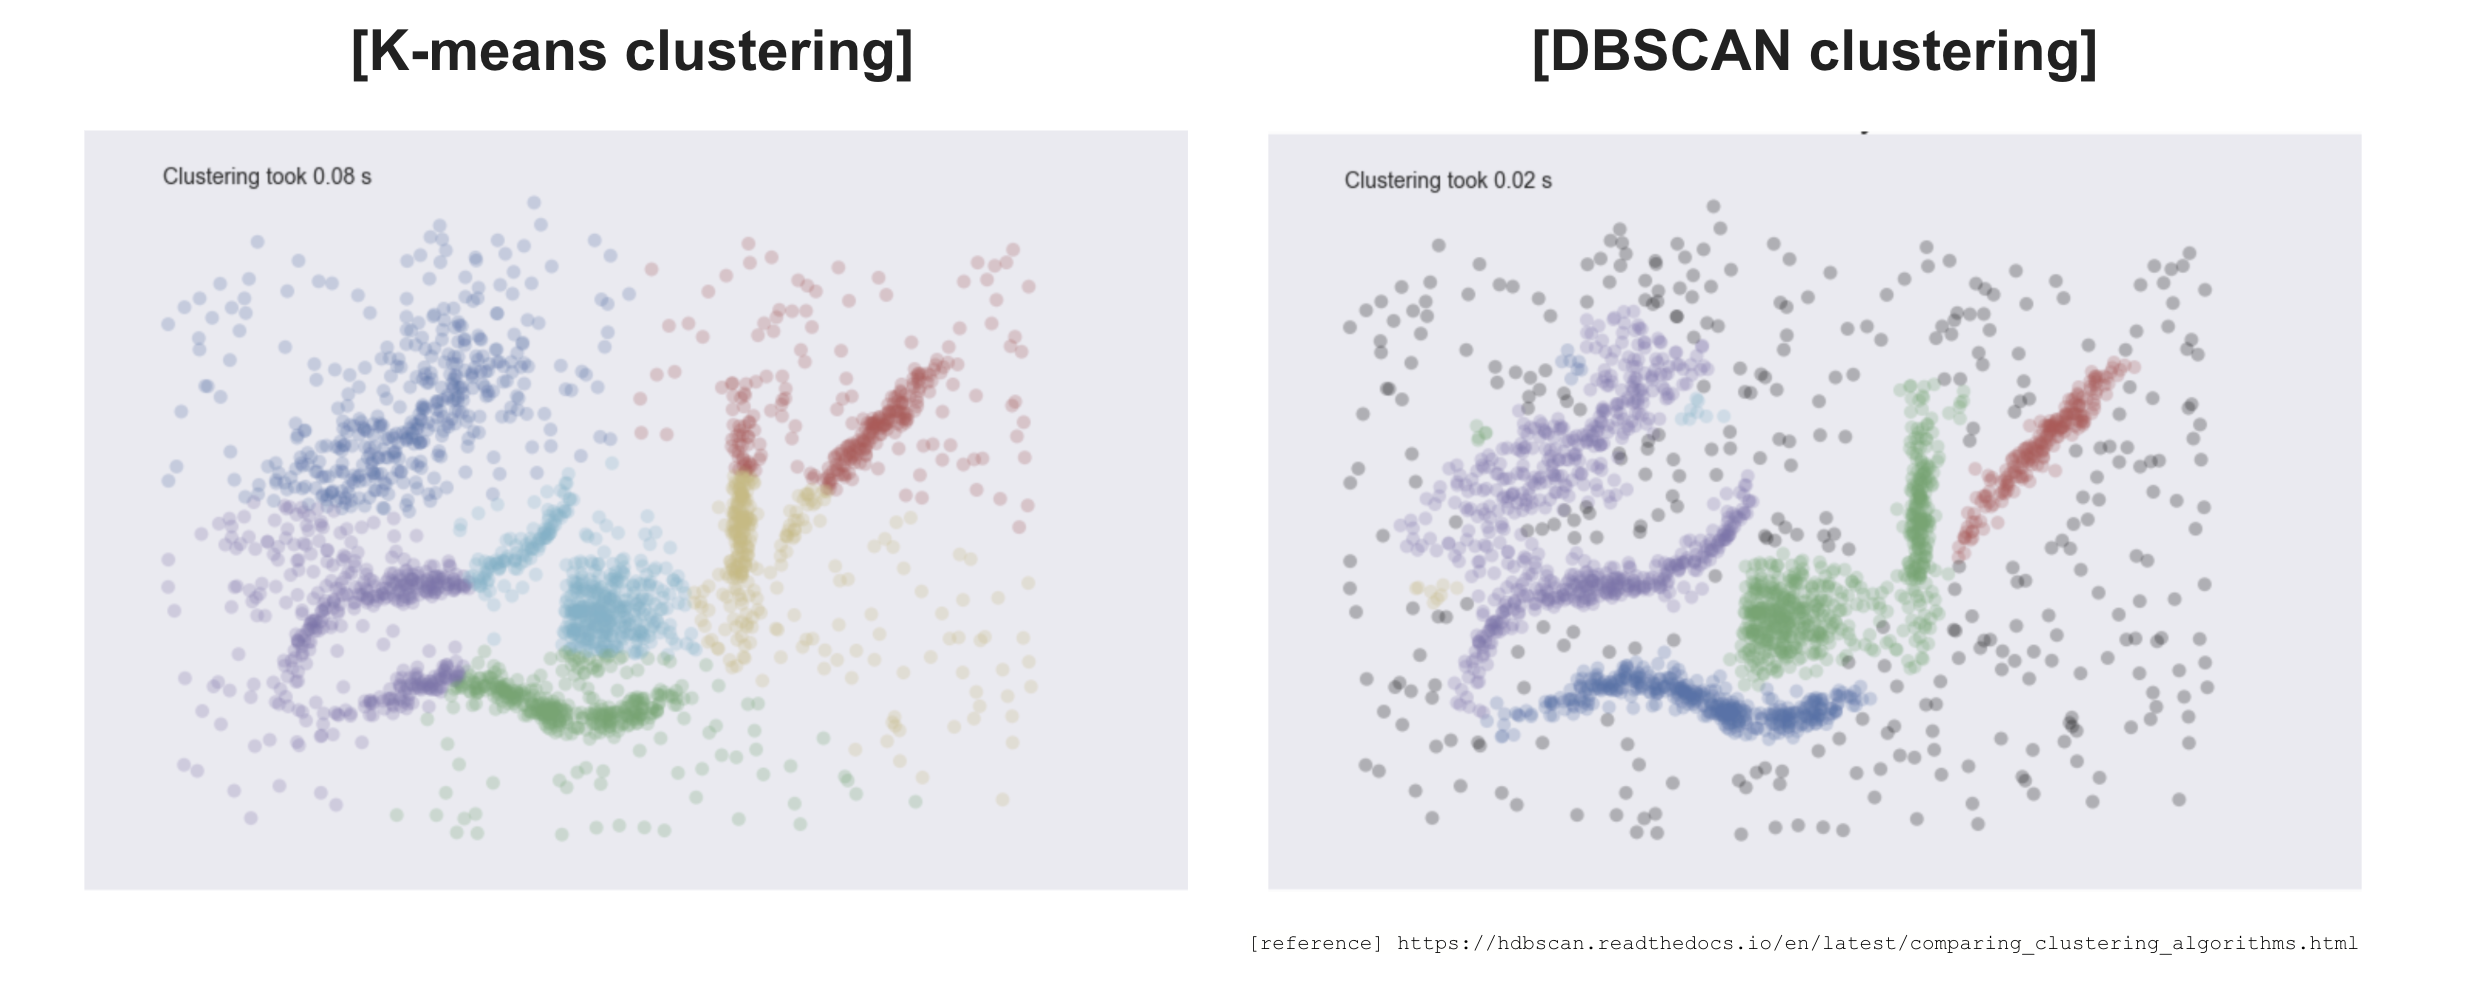

### DBSCAN - 비구형(nonspherical) 데이터 생성

In [ ]:
# make_moons를 이용하여 DBSCAN 알고리즘을 적용시킬 비구형분포 데이터를 생성
from sklearn.datasets import make_moons

moon_data, moon_labels = make_moons(n_samples=400, noise=0.1, random_state=42)
moon_data[:5]

array([[-0.04405185,  0.43607778],
       [ 0.69223045, -0.40111946],
       [ 0.8281978 ,  0.54152189],
       [ 0.17881243,  0.26886231],
       [ 0.0917154 ,  0.94611799]])

In [ ]:
moon_data_df = pd.DataFrame(moon_data, columns=["x", "y"])
moon_data_df["label"] = moon_labels
moon_data_df.head()

,x,y,label
0,-0.044052,0.436078,1
1,0.692230,-0.401119,1
2,0.828198,0.541522,0
3,0.178812,0.268862,1
4,0.091715,0.946118,0


In [ ]:
fig = px.scatter(moon_data_df, x="x", y="y", color="label")
fig.update_layout(width=600, height=500)
fig.show()

### DBSCAN - DBSCAN 알고리즘 탐색

[Parameters]

- eps(epsilon): 기준점부터의 반경
- min_samples: 반경내 있어야할 최소 data points


In [ ]:
from sklearn.cluster import DBSCAN

### DBSCAN - DBSCAN 알고리즘 훈련

In [ ]:
dbscan = DBSCAN(eps=0.2, min_samples=6)

In [ ]:
dbscan.fit(moon_data)

DBSCAN(eps=0.2, min_samples=6)

In [ ]:
dbscan_label = dbscan.labels_
dbscan_label[:10]

set(dbscan_label)

{np.int64(-1), np.int64(0), np.int64(1)}

DBSCAN - DBSCAN 알고리즘 파라미터 비교

In [ ]:
moon_data_df["dbscan_label"] = dbscan_label

fig = px.scatter(moon_data_df, x="x", y="y", color="dbscan_label")
fig.update_layout(width=600, height=500)
fig.show()

In [ ]:
for eps in [0.1, 0.2, 0.5]:
  dbscan = DBSCAN(eps=eps, min_samples=6).fit(moon_data)
  dbscan_label = dbscan.labels_
  print(f"eps:{eps} ->> label수: {len(set(dbscan_label))}")
  moon_data_df["dbscan_label"] = dbscan_label
  fig = px.scatter(moon_data_df, x="x", y="y", color="dbscan_label")
  fig.update_layout(width=600, height=500)
  fig.show()

eps:0.1 ->> label수: 19


eps:0.2 ->> label수: 3


eps:0.5 ->> label수: 1


In [ ]:
for min_samples in [2, 6, 30]:
  dbscan = DBSCAN(eps=0.2, min_samples=min_samples).fit(moon_data)
  dbscan_label = dbscan.labels_
  print(f"min_samples:{min_samples} ->> label수: {len(set(dbscan_label))}")
  moon_data_df["dbscan_label"] = dbscan_label
  fig = px.scatter(moon_data_df, x="x", y="y", color="dbscan_label")
  fig.update_layout(width=600, height=500)
  fig.show()

min_samples:2 ->> label수: 3


min_samples:6 ->> label수: 3


min_samples:30 ->> label수: 1


### DBSCAN - DBSCAN와 K-means의 성능 비교

In [ ]:
moon_km = KMeans(n_clusters = 2).fit(moon_data)
moon_km

KMeans(n_clusters=2)

In [ ]:
compare_kmeans_clusters = dict(zip(moon_km.labels_, moon_labels))
print(compare_kmeans_clusters)

{np.int32(0): np.int64(0), np.int32(1): np.int64(1)}


In [ ]:
moon_data_df["kmeans_label"] = moon_km.labels_
moon_data_df["kmeans_label"] = moon_data_df["kmeans_label"].astype(str)

moon_dbscan = DBSCAN(eps=0.2, min_samples=6).fit(moon_data)
moon_data_df["dbscan_label"] = moon_dbscan.labels_
moon_data_df["dbscan_label"] = moon_data_df["dbscan_label"].astype(str)

for label_case in ["dbscan_label", "kmeans_label"]:
  fig = px.scatter(moon_data_df, x="x", y="y", color=label_case)
  fig.update_layout(width=600, height=500, title=f"{label_case} 시각화")
  fig.show()

### DBSCAN - clustering 결과를 수치적으로 평가

In [ ]:
def find_matching_cluster(cluster_case, actual_labels, cluster_labels):
    matched_cluster={}
    temp_labels = [i+100 for i in range(100)]
    actual_case = list(set(actual_labels))
    for i in cluster_case:
      if len(actual_case) > 0:
        idx = cluster_labels == i
        new_label=scipy.stats.mode(actual_labels[idx], keepdims=True).mode[0] # 동일한 위치의 label에서 가장 빈번한 cluster명을 찾아줌 (=mode)
        print(actual_case, "-", new_label)
        if new_label in actual_case:
          actual_case.remove(new_label)
        else:
          new_label=temp_labels[new_label]
          temp_labels.remove(new_label)
        # 매칭되는 실제 label명을 dict형태로 저장
        matched_cluster[i]=new_label
      else:
        new_label=None
      print(f"훈련된 label명: {i} >> 가장 빈번한 실제 label명: {new_label}")
    return matched_cluster

In [ ]:
dbscan_labels = moon_dbscan.labels_
dbscan_case_dict = dict((x,list(dbscan_labels).count(x)) for x in set(dbscan_labels))
sorted_dbscan_case = sorted(dbscan_case_dict, key=dbscan_case_dict.get, reverse=True)
print(sorted_dbscan_case)

[np.int64(1), np.int64(0), np.int64(-1)]


In [ ]:
dbscan_perm_dict = find_matching_cluster(sorted_dbscan_case, moon_labels, dbscan_labels)
dbscan_perm_dict

[np.int64(0), np.int64(1)] - 0
훈련된 label명: 1 >> 가장 빈번한 실제 label명: 0
[np.int64(1)] - 1
훈련된 label명: 0 >> 가장 빈번한 실제 label명: 1
훈련된 label명: -1 >> 가장 빈번한 실제 label명: None


{np.int64(1): np.int64(0), np.int64(0): np.int64(1)}

In [ ]:
# 훈련된 label명과 실제 label명이 매칭되는 경우 >> 새로 매칭된 label명으로 변경
# 훈련된 label명과 실제 label명이 매칭되지 않는 경우 >> 훈련된 label명 유지

dbscan_new_labels = [label if label not in dbscan_perm_dict else dbscan_perm_dict[label] for label in dbscan_labels]
print(np.array(dbscan_new_labels[:80]))
print(dbscan_labels[:80])

[ 1  1  0  1  0  0  1  0  1  0  0  1  0  0  0  0  1  1  1  1  0  0  1  1
  0  1  0  1  1  0  1  0  1  0  1  0  0  1  0  0  1  0  0  0  0  1  0  0
  0  0  0  1  1  0  1  0  1  0  0  0  0  1  1  0  0  0  1  1 -1  0  1  0
  0  0  1  1  1  1  0  1]
[ 0  0  1  0  1  1  0  1  0  1  1  0  1  1  1  1  0  0  0  0  1  1  0  0
  1  0  1  0  0  1  0  1  0  1  0  1  1  0  1  1  0  1  1  1  1  0  1  1
  1  1  1  0  0  1  0  1  0  1  1  1  1  0  0  1  1  1  0  0 -1  1  0  1
  1  1  0  0  0  0  1  0]


In [ ]:
kmean_labels = moon_km.labels_
km_case = list(set(kmean_labels))
kmean_perm_dict = find_matching_cluster(km_case, moon_labels, kmean_labels)
kmean_perm_dict

[np.int64(0), np.int64(1)] - 0
훈련된 label명: 0 >> 가장 빈번한 실제 label명: 0
[np.int64(1)] - 1
훈련된 label명: 1 >> 가장 빈번한 실제 label명: 1


{np.int32(0): np.int64(0), np.int32(1): np.int64(1)}

In [ ]:
kmean_new_labels = [kmean_perm_dict[label] for label in kmean_labels]

In [ ]:
moon_kmeans_acc = accuracy_score(moon_labels, kmean_new_labels)
print(f"Accuracy score of K-means : {round(moon_kmeans_acc, 4)}")

moon_dbscan_acc = accuracy_score(moon_labels, dbscan_new_labels)
print(f"Accuracy score of DBSCAN : {round(moon_dbscan_acc, 4)}")

Accuracy score of K-means : 0.74
Accuracy score of DBSCAN : 0.9925


### DBSCAN - silhouette score 비교

In [ ]:
# silhouette score도 accuracy score과 동일한 결과인지 비교
km_sc_value = silhouette_score(np.array(moon_data), kmean_new_labels, metric="euclidean", sample_size=None, random_state=None)
print(f'Silhouette score of K-means: {round(km_sc_value,4)}')


dbscan_sc_value = silhouette_score(np.array(moon_data), dbscan_new_labels, metric="euclidean", sample_size=None, random_state=None)
print(f'Silhouette score of DBSCAN: {round(dbscan_sc_value,4)}')

Silhouette score of K-means: 0.4831
Silhouette score of DBSCAN: 0.2634



[silhouette score 특징]  
silhouette score 계산 방법의 특징 때문에 구형이 아닌 경우 실제 시각화에서는 dbscan의 군집이 합리적이게 보이나 silhouette score 점수는 오히려 낮게 나올 수 있음    
(데이터 분포가 구형이 아닌 경우 각 군집의 중심점이 다른 군집과 가까워질 수 있기 때문)


###DBSCAN - Adjusted rand index 비교


In [ ]:
from sklearn.metrics import adjusted_rand_score

km_ari = adjusted_rand_score(moon_labels, kmean_new_labels)
print(f'Adjusted rand index (ARI) of K-means: {round(km_ari,4)}')

dbscan_ari = adjusted_rand_score(moon_labels, dbscan_new_labels)
print(f'Adjusted rand index (ARI) of DBSCAN: {round(dbscan_ari,4)}')

Adjusted rand index (ARI) of K-means: 0.2285
Adjusted rand index (ARI) of DBSCAN: 0.985


### [DBSCAN - 항상 DBSCAN이 best ?

In [ ]:
iris_compare_df = x_train.copy()

# k-means 훈련시키기
km_iris = KMeans(n_clusters = 3).fit(iris_compare_df)
iris_compare_df["km_iris_label"] = km_iris.labels_
# iris_compare_df["km_iris_label"] = iris_compare_df["km_iris_label"].astype(str)
print(f"K-means label 종류: {list(set(km_iris.labels_))}")

# dbscan 훈련시키기
dbscan_iris = DBSCAN(eps=0.2, min_samples=6).fit(iris_compare_df)
iris_compare_df["dbscan_iris_label"] = dbscan_iris.labels_
# iris_compare_df["dbscan_iris_label"] = iris_compare_df["dbscan_iris_label"].astype(str)
print(f"DBSCAN label 종류: {list(set(dbscan_iris.labels_))}")

K-means label 종류: [np.int32(0), np.int32(1), np.int32(2)]
DBSCAN label 종류: [np.int64(0), np.int64(-1)]


In [ ]:
# 수치로 비교

# k-means
iris_km_labels = km_iris.labels_ # km 훈련된 전체 lable
iris_km_case = list(set(iris_km_labels)) # km 훈련된 lable 종류
# label 매칭 시키기
iris_km_perm_dict = find_matching_cluster(iris_km_case, y_train, iris_km_labels)
iris_km_new_labels = [iris_km_perm_dict[label] for label in iris_km_labels]

# DataFrame에 컬럼 추가하기
iris_compare_df["new_km_iris_label"] = iris_km_new_labels
print(iris_km_perm_dict)

[0, 1, 2] - 2
훈련된 label명: 0 >> 가장 빈번한 실제 label명: 2
[0, 1] - 0
훈련된 label명: 1 >> 가장 빈번한 실제 label명: 0
[1] - 1
훈련된 label명: 2 >> 가장 빈번한 실제 label명: 1
{np.int32(0): np.int64(2), np.int32(1): np.int64(0), np.int32(2): np.int64(1)}


In [ ]:
# dbscan
iris_dbscan_labels = dbscan_iris.labels_ # dbscan 훈련된 전체 lable

# labele 정렬하기
iris_dbscan_case_dict = dict((x,list(iris_dbscan_labels).count(x)) for x in set(iris_dbscan_labels))
sorted_iris_dbscan_case = sorted(iris_dbscan_case_dict, key=iris_dbscan_case_dict.get, reverse=True)
iris_dbscan_case_dict


{np.int64(0): 7, np.int64(-1): 113}

In [ ]:
# label 매칭 시키기
iris_dbscan_perm_dict = find_matching_cluster(sorted_iris_dbscan_case, y_train, iris_dbscan_labels)
#
iris_dbscan_new_labels = [label if label not in iris_dbscan_perm_dict else iris_dbscan_perm_dict[label] for label in iris_dbscan_labels]
# DataFrame에 컬럼 추가하기

iris_compare_df["new_dbscan_iris_label"] = iris_dbscan_new_labels
# iris_compare_df["new_dbscan_iris_label"] = iris_compare_df["new_dbscan_iris_label"].astype(str)

[0, 1, 2] - 1
훈련된 label명: -1 >> 가장 빈번한 실제 label명: 1
[0, 2] - 0
훈련된 label명: 0 >> 가장 빈번한 실제 label명: 0


In [ ]:
kmeans_train_acc = accuracy_score(y_train, iris_km_new_labels)
print(f"Accuracy score of K-means train set : {round(kmeans_train_acc, 4)}")

dbscan_iris_acc = accuracy_score(y_train, iris_dbscan_new_labels)
print(f"Accuracy score of DBSCAN : {round(dbscan_iris_acc, 4)}")

Accuracy score of K-means train set : 0.9083
Accuracy score of DBSCAN : 0.4


In [ ]:
# 시각화로 비교하기

fig = make_subplots(rows=1, cols=3, subplot_titles=("Actual", "K-means cluster", "DBSCAN cluster"))
# actual.
fig.add_trace(
    go.Scatter(x=iris_compare_df["sepal_width"],
               y=iris_compare_df["sepal_length"],
               mode="markers",
               marker=dict(color=y_train),
               text=y_train
               ),
    row=1, col=1
)
# k-means
fig.add_trace(
    go.Scatter(x=iris_compare_df["sepal_width"],
               y=iris_compare_df["sepal_length"],
               mode="markers",
               marker=dict(color=iris_compare_df["new_km_iris_label"]),
               text=iris_compare_df["new_km_iris_label"]
               ),
    row=1, col=2
)
# dbscan
fig.add_trace(
    go.Scatter(x=iris_compare_df["sepal_width"],
               y=iris_compare_df["sepal_length"],
               mode="markers",
               marker=dict(color=iris_compare_df["new_dbscan_iris_label"]),
               text=iris_compare_df["new_dbscan_iris_label"]
               ),
    row=1, col=3
)
fig.update_layout(height=600, width=1000, showlegend=False)
fig.show()


In [ ]:
# 시각화로 비교하기

fig = make_subplots(rows=1, cols=3, subplot_titles=("Actual", "K-means cluster", "DBSCAN cluster"))
# actual.
fig.add_trace(
    go.Scatter(x=iris_compare_df["petal_width"],
               y=iris_compare_df["petal_length"],
               mode="markers",
               marker=dict(color=y_train),
               text=y_train
               ),
    row=1, col=1
)
# k-means
fig.add_trace(
    go.Scatter(x=iris_compare_df["petal_width"],
               y=iris_compare_df["petal_length"],
               mode="markers",
               marker=dict(color=iris_compare_df["new_km_iris_label"]),
               text=iris_compare_df["new_km_iris_label"]
               ),
    row=1, col=2
)
# dbscan
fig.add_trace(
    go.Scatter(x=iris_compare_df["petal_width"],
               y=iris_compare_df["petal_length"],
               mode="markers",
               marker=dict(color=iris_compare_df["new_dbscan_iris_label"]),
               text=iris_compare_df["new_dbscan_iris_label"]
               ),
    row=1, col=3
)
fig.update_layout(height=600, width=1000, showlegend=False)
fig.show()


## HDBSCAN 알고리즘

### HDBSCAN 알고리즘 기초

HDBSCAN 알고리즘 (hierarchical density-based spatial clustering of applications with noise) :



[HDBSCAN 특징]
- DBSCAN에서 Hierarchical가 합쳐진 알고리즘
- different sizes, densities, noise, arbitrary shapes인 데이터에 적합
- 계층적 구조를 반영한 clustering 가능



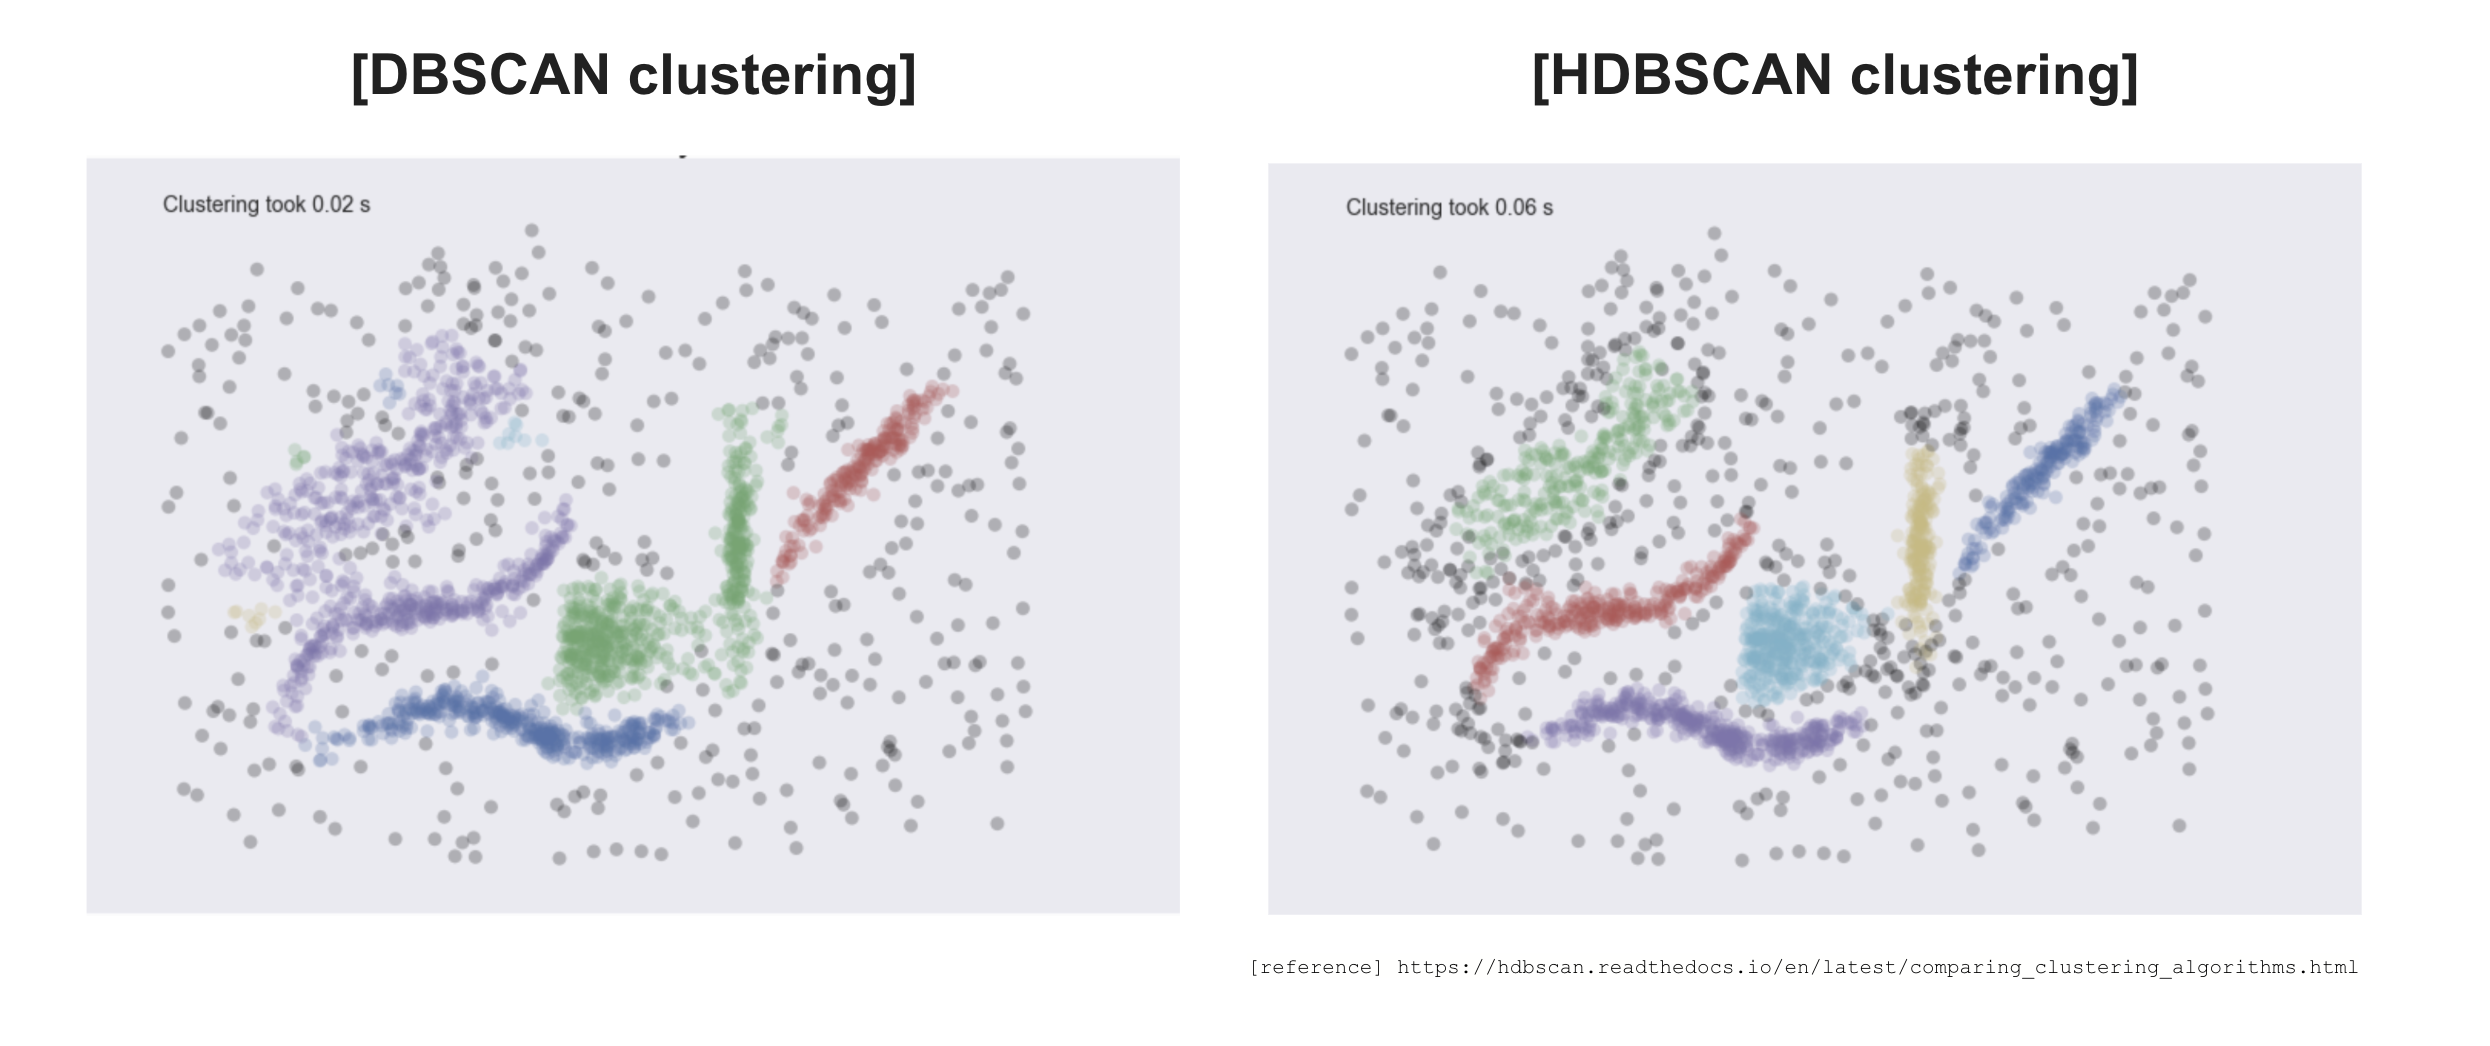

### HDBSCAN - 다양한 분포/사이즈의 데이터 생성


In [ ]:
from sklearn.datasets import make_blobs

moons, _ = make_moons(n_samples=100, noise=0.05)
blobs1, _ = make_blobs(n_samples=50, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.25)
blobs2, _ = make_blobs(n_samples=30, centers=[(-0.3,-1), (4.0, 1.5)], cluster_std=0.3)
blobs3, _ = make_blobs(n_samples=100, centers=[(3,-1), (4.0, 1.5)], cluster_std=0.4)

hdb_data = np.vstack([moons, blobs1, blobs2, blobs3])
hdb_data_df = pd.DataFrame(hdb_data, columns=["x", "y"])
hdb_data_df.head()

,x,y
0,1.952359,0.387794
1,-0.787929,0.504377
2,0.815216,0.655983
3,1.960552,0.251971
4,1.347687,-0.429660


In [ ]:
# scatter plot 생성
fig = px.scatter(hdb_data_df, x="x", y="y")

# 그래프 사이즈 조절
fig.update_layout(width=600, height=500, title="HDBSCAN 데이터 분포")

fig.show()

### HDBSCAN - HDBSCAN 알고리즘 탐색  

[Parameters]

- min_cluster_size (default=5): 군집화를 위한 최소한의 cluster 사이즈
- min_samples (default=None) : 반경내 있어야할 최소 data points
- cluster_selection_epsilon(default=0.0): 거리 기준. 이 기준보다 아래의 거리는 cluster끼리 merge 됨


In [ ]:
!pip install hdbscan

In [ ]:
import hdbscan

### HDBSCAN 알고리즘 훈련

In [ ]:
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=5)

In [ ]:
hdbscan_model.fit(hdb_data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



HDBSCAN()

In [ ]:
hdbscan_label = hdbscan_model.fit_predict(hdb_data)
hdbscan_label[:10]

set(hdbscan_label)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



{np.int64(-1),
 np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6)}

### HDBSCAN 알고리즘 파라미터 비교

In [ ]:
hdb_data_df["hdbscan_label"] = hdbscan_label
hdb_data_df["hdbscan_label"] = hdb_data_df["hdbscan_label"].astype(str)

fig = px.scatter(hdb_data_df, x="x", y="y", color="hdbscan_label")
fig.update_layout(width=600, height=500)
fig.show()

In [ ]:
for mcn in [3,5,7,9,13]:
  hdbscan_label = hdbscan.HDBSCAN(min_cluster_size=mcn, min_samples=None, prediction_data=True).fit_predict(hdb_data)
  hdb_data_df["hdbscan_label"] = hdbscan_label
  hdb_data_df["hdbscan_label"] = hdb_data_df["hdbscan_label"].astype(str)

  # outlier 추세확인
  hdbscan_case_dict = dict((x,list(hdbscan_label).count(x)) for x in set(hdbscan_label))
  outliers = hdbscan_case_dict[-1]

  fig = px.scatter(hdb_data_df, x="x", y="y", color="hdbscan_label")
  fig.update_layout(width=600, height=500, title=f"min_cluster_size={mcn} > label수: {len(set(hdbscan_label))}, outlier: {outliers}")
  fig.show()

In [ ]:
for ms in [3,5,7,9,13]:
  hdbscan_label = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=ms, prediction_data=True).fit_predict(hdb_data)
  hdb_data_df["hdbscan_label"] = hdbscan_label
  hdb_data_df["hdbscan_label"] = hdb_data_df["hdbscan_label"].astype(str)

  # outlier 추세확인
  hdbscan_case_dict = dict((x,list(hdbscan_label).count(x)) for x in set(hdbscan_label))
  outliers = hdbscan_case_dict[-1]

  fig = px.scatter(hdb_data_df, x="x", y="y", color="hdbscan_label")
  fig.update_layout(width=600, height=500, title=f"min_samples={ms} > label수: {len(set(hdbscan_label))}, outlier: {outliers}")
  fig.show()

In [ ]:
for cse in [0.1,0.5,0.7,1.0]:
  hdbscan_label = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=None, cluster_selection_epsilon=cse, prediction_data=True).fit_predict(hdb_data)
  hdb_data_df["hdbscan_label"] = hdbscan_label
  hdb_data_df["hdbscan_label"] = hdb_data_df["hdbscan_label"].astype(str)

  # outlier 추세확인
  hdbscan_case_dict = dict((x,list(hdbscan_label).count(x)) for x in set(hdbscan_label))
  # outliers = hdbscan_case_dict[-1]
  outliers = hdbscan_case_dict.get(-1, 0)

  fig = px.scatter(hdb_data_df, x="x", y="y", color="hdbscan_label")
  fig.update_layout(width=600, height=500, title=f"cluster_selection_epsilon={cse} > label수: {len(set(hdbscan_label))}, outlier: {outliers}")
  fig.show()

### HDBSCAN - HDBSCAN의 다양한 시각화 확인

<Axes: >

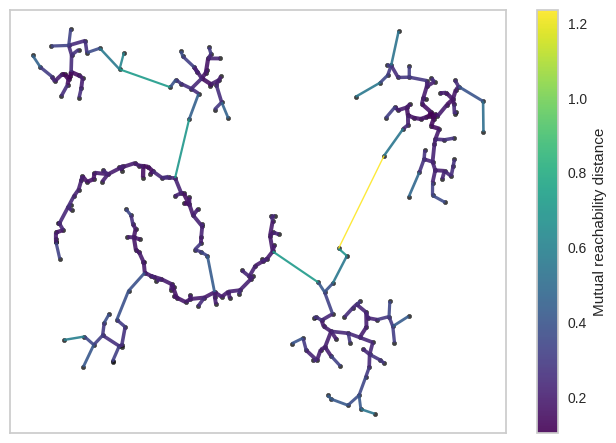

In [ ]:
# 각 point를 이어주는 line을 distance를 점수화한 mutual reachabillity를 사용하여 나타낸 그래프
# point간의 거리를 나타낸 것이 아닌 line은 그려나가면서 아직 추가되지 않은 point들 중에서 mutual reachabillity가 가장 낮은 point를 하나씩만 추가하는 방식으로 진행

hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=None, cluster_selection_epsilon=0.1, gen_min_span_tree=True).fit(hdb_data)

hdbscan_model.minimum_spanning_tree_.plot(edge_cmap="viridis",
                                      edge_alpha=0.9,
                                      node_size=10,
                                      edge_linewidth=1)

<Axes: ylabel='$\\lambda$ value'>

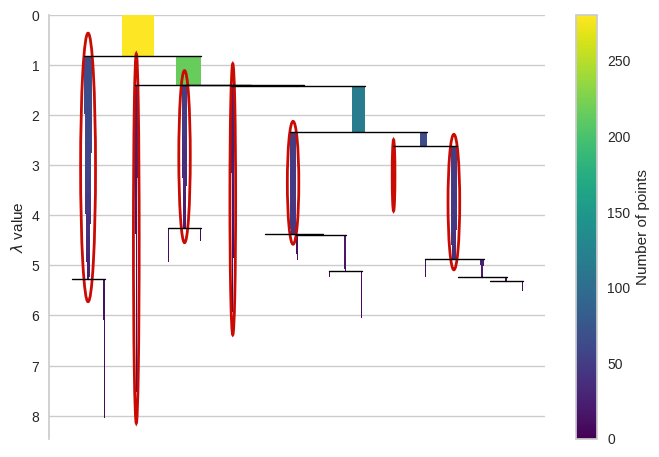

In [ ]:
# 가장 오래 버틴 cluster 순으로 cluster을 분류

hdbscan_model.condensed_tree_.plot(select_clusters=True)

### HDBSCAN와 K-means의 성능 비교

In [ ]:
hdb_data_km = KMeans(n_clusters=7).fit(hdb_data)
hdb_data_km

KMeans(n_clusters=7)

In [ ]:
hdb_data_hdbscan_lable = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=None, cluster_selection_epsilon=0.1, gen_min_span_tree=True).fit_predict(hdb_data)
hdb_data_hdbscan_lable[:10]

array([6, 4, 4, 6, 6, 6, 6, 6, 4, 4])

In [ ]:
hdb_data_df.head()

,x,y,hdbscan_label
0,1.952359,0.387794,1
1,-0.787929,0.504377,1
2,0.815216,0.655983,1
3,1.960552,0.251971,1
4,1.347687,-0.429660,1


In [ ]:
hdb_data_df["kmeans_label"] = hdb_data_km.labels_
hdb_data_df["kmeans_label"] = hdb_data_df["kmeans_label"].astype(str)

hdb_data_df["hdbscan_label"] = hdb_data_hdbscan_lable
hdb_data_df["hdbscan_label"] = hdb_data_df["hdbscan_label"].astype(str)

for label_case in ["hdbscan_label", "kmeans_label"]:
  fig = px.scatter(hdb_data_df, x="x", y="y", color=label_case)
  fig.update_layout(width=600, height=500, title=f"{label_case} 시각화")
  fig.show()

### HDBSCAN와 DBSCAN의 성능 비교

In [ ]:
hdb_data_dbscan = DBSCAN(eps=0.3, min_samples=5).fit(hdb_data)
hdb_data_df["dbscan_label"] = hdb_data_dbscan.labels_
hdb_data_df["dbscan_label"] = hdb_data_df["dbscan_label"].astype(str)

for label_case in ["hdbscan_label", "dbscan_label"]:
  fig = px.scatter(hdb_data_df, x="x", y="y", color=label_case)
  fig.update_layout(width=600, height=500, title=f"{label_case} 시각화")
  fig.show()


### 데이터 분포에 따른 HDBSCAN와 DBSCAN의 차이 확인

In [ ]:
# 분산이 극단적인 두가지 케이스
blobs1, _ = make_blobs(n_samples=200, centers=[(-10, 5), (0, -5)], cluster_std=0.5)
blobs2, _ = make_blobs(n_samples=200, centers=[(30, -1), (30, 1.5)], cluster_std=5.0)

comp_data = np.vstack([blobs1, blobs2])
comp_data_df = pd.DataFrame(comp_data, columns=["x", "y"])

In [ ]:
fig = px.scatter(comp_data_df, x="x", y="y")
fig.update_layout(width=600, height=500, title="데이터 분포")

fig.show()

In [ ]:
dbscan_model = DBSCAN(eps=0.6, min_samples=10).fit(comp_data)
comp_data_df["dbscan_label"] = dbscan_model.labels_
comp_data_df["dbscan_label"] = comp_data_df["dbscan_label"].astype(str)

hdbscan_lables = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=None, cluster_selection_epsilon=0.1, gen_min_span_tree=True).fit_predict(comp_data)
comp_data_df["hdbscan_label"] = hdbscan_lables
comp_data_df["hdbscan_label"] = comp_data_df["hdbscan_label"].astype(str)

In [ ]:
color_dict = {"-1":"#d8d8d8", "0":"#ff5e5b", "1":"#457b9d", "2":"#00cecb", "3":"#FFED66"}

comp_data_df["dbscan_label_color"] = comp_data_df["dbscan_label"].map(color_dict)
comp_data_df["hdbscan_label_color"] = comp_data_df["hdbscan_label"].map(color_dict)

for label_case in ["hdbscan_label", "dbscan_label"]:
  fig = go.Figure(data=go.Scatter(
      x=comp_data_df["x"],
      y=comp_data_df["y"],
      mode="markers",
      marker=dict(color=comp_data_df[label_case+"_color"], showscale=True)
  ))
  fig.update_layout(width=600, height=500, title=f"{label_case} 시각화")
  fig.show()
